# Overview

## a) Introduction.


Customer Lifetime Value (CLV) prediction is crucial for businesses offering subscription services. By accurately estimating the long-term value of customers, companies can tailor marketing strategies, improve customer retention efforts, and optimize resource allocation for maximum revenue. This proposal outlines a comprehensive approach to develop a CLV prediction model using machine learning techniques.

## b) Problem Statement.

The objective is to create a reliable predictive model capable of accurately estimating the Customer Lifetime Value (CLV) of individual customers subscribing to services. This endeavor will empower businesses to:

 a) Make well-informed decisions regarding resource allocation, ensuring optimal utilization and efficiency.

 b) Fine-tune marketing strategies to effectively target high-value customers, maximizing return on investment and revenue generation.
 
 c) Implement strategic customer retention programs tailored to the unique needs and behaviors of different customer segments, fostering long-term loyalty and profitability.

## c)  Objectives.

● Collect and preprocess historical customer transaction data.

● Engineer relevant features that capture key aspects of customer behavior and purchasing patterns.

● Select appropriate machine learning algorithms and models for CLV prediction.

● Train and evaluate the performance of the CLV prediction model.

● Providing actionable insights and recommendations based on the model results.

## d) Metric of Success

Our model will be considered successful if the following metrics will be attained:

Recall score of 85%

Accuracy score of 86%


# Data Understanding

This data is about a subscription-based digital product offering for financial advisory that includes newsletters, webinars, and investment recommendations. The offering has a couple of varieties, annual subscription, and digital subscription. The product also provides daytime support for customers to reach out to a care team that can help them with any product-related questions and signup/cancellation-related queries.

The data set contains the following information:

 a) Customer sign-up and cancellation dates at the product level

 b) Call center activity

 c) Customer demographics

 d) Product pricing info

 This dataset was obtained from https://www.kaggle.com/datasets/gsagar12/dspp1?resource=download&select=customer_product.csv

In [224]:
# importing necessaries libraries
# basic
import pandas as pd
import numpy as np

# to handle warnings
# import warnings
#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#warnings.fiterwarnings("ignore", category=FutureWarning)

In [225]:
# importing customer cases
case = pd.read_csv("data/customer_cases.csv")
case.head()

,Unnamed: 0,case_id,date_time,customer_id,channel,reason
0,1,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,2,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,3,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,4,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [226]:
# Get a brief overview using .info()
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   330512 non-null  int64 
 1   case_id      330512 non-null  object
 2   date_time    330512 non-null  object
 3   customer_id  330512 non-null  object
 4   channel      330512 non-null  object
 5   reason       330512 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.1+ MB


In [227]:
case = case.drop(columns=["Unnamed: 0"])
case.head()

,case_id,date_time,customer_id,channel,reason
0,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [228]:
info = pd.read_csv("data/customer_info.csv")
info.head()

,Unnamed: 0,customer_id,age,gender
0,1,C2448,76,female
1,2,C2449,61,male
2,3,C2450,58,female
3,4,C2451,62,female
4,5,C2452,71,male


In [229]:
info = info.drop(columns=["Unnamed: 0"])
info.head()

,customer_id,age,gender
0,C2448,76,female
1,C2449,61,male
2,C2450,58,female
3,C2451,62,female
4,C2452,71,male


In [230]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  508932 non-null  object
 1   age          508932 non-null  int64 
 2   gender       508932 non-null  object
dtypes: int64(1), object(2)
memory usage: 11.6+ MB


In [231]:
merge_one = pd.merge(case, info, on="customer_id")
merge_one.head()

,case_id,date_time,customer_id,channel,reason,age,gender
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male


In [232]:
product = pd.read_csv("data/customer_product.csv")
product.head()

,Unnamed: 0,customer_id,product,signup_date_time,cancel_date_time
0,1,C2448,prd_1,2017-01-01 10:35:09,NaN
1,2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,4,C2451,prd_2,2017-01-01 13:32:08,NaN
4,5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [233]:
product = product.drop(columns=["Unnamed: 0"])
product.head()

,customer_id,product,signup_date_time,cancel_date_time
0,C2448,prd_1,2017-01-01 10:35:09,NaN
1,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,C2451,prd_2,2017-01-01 13:32:08,NaN
4,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [234]:
merge_two = pd.merge(merge_one, product, on= "customer_id")
merge_two.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [235]:
p_info = pd.read_csv("data/product_info.csv")
p_info.head()

,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [236]:
p_info.rename(columns={"product_id": "product"}, inplace=True)
p_info.head()

,product,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [237]:
data = pd.merge(merge_two, p_info, on="product")
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,signup_date_time,cancel_date_time,name,price,billing_cycle
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,2017-01-01 10:35:09,NaN,annual_subscription,1200,12
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,2017-01-01 13:32:08,NaN,monthly_subscription,125,1
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   case_id           330512 non-null  object
 1   date_time         330512 non-null  object
 2   customer_id       330512 non-null  object
 3   channel           330512 non-null  object
 4   reason            330512 non-null  object
 5   age               330512 non-null  int64 
 6   gender            330512 non-null  object
 7   product           330512 non-null  object
 8   signup_date_time  330512 non-null  object
 9   cancel_date_time  76686 non-null   object
 10  name              330512 non-null  object
 11  price             330512 non-null  int64 
 12  billing_cycle     330512 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 32.8+ MB


In [239]:
data.isnull().sum()

case_id                  0
date_time                0
customer_id              0
channel                  0
reason                   0
age                      0
gender                   0
product                  0
signup_date_time         0
cancel_date_time    253826
name                     0
price                    0
billing_cycle            0
dtype: int64

In [240]:
display(data.describe(), data.describe(include="object"))

,age,price,billing_cycle
count,330512.000000,330512.000000,330512.000000
mean,57.840617,672.163265,6.598880
std,9.394142,537.413942,5.499119
min,22.000000,125.000000,1.000000
25%,52.000000,125.000000,1.000000
50%,58.000000,1200.000000,12.000000
75%,65.000000,1200.000000,12.000000
max,78.000000,1200.000000,12.000000


,case_id,date_time,customer_id,channel,reason,gender,product,signup_date_time,cancel_date_time,name
count,330512,330512,330512,330512,330512,330512,330512,330512,76686,330512
unique,330512,329205,258660,2,2,2,2,257798,59539,2
top,CC101,2021-05-18 13:58:31,C20510,phone,support,male,prd_1,2020-03-30 10:32:51,2021-08-16 13:06:05,annual_subscription
freq,1,3,5,286840,200985,189224,168227,6,5,168227


# EDA

In [241]:
# splitting sign-up time
data[["signup_date", "signup_time"]] = data["signup_date_time"].str.split(' ', expand=True)
data["signup_date"] = pd.to_datetime(data["signup_date"])
#dropping signup date time column
data.drop(columns=["signup_date_time"], inplace=True)

# splitting signup date to month and year
data["signup_month"] = data["signup_date"].dt.month
data["signup_year"] = data["signup_date"].dt.year
#dropping signup date
data.drop(columns=["signup_date"], inplace=True)

data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,cancel_date_time,name,price,billing_cycle,signup_time,signup_month,signup_year
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,NaN,annual_subscription,1200,12,10:35:09,1,2017
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,2021-09-05 10:00:02,annual_subscription,1200,12,11:39:29,1,2017
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,2019-01-13 16:24:55,annual_subscription,1200,12,11:42:00,1,2017
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,NaN,monthly_subscription,125,1,13:32:08,1,2017
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,2021-06-28 18:06:01,annual_subscription,1200,12,13:57:30,1,2017


In [242]:
#splitting cancel date time to cancel date and time 
data[["cancel_date", "cancel_time"]] = data["cancel_date_time"].str.split(' ', expand=True)
#converting cancel date to datetime
data["cancel_date"] = pd.to_datetime(data["cancel_date"])

#dropping cance_date_time column
data.drop(columns=["cancel_date_time"], inplace=True)

#extracting month and year from cancel date
data["cancel_month"] = data["cancel_date"].dt.month
data["cancel_year"] = data["cancel_date"].dt.year

data.drop(columns=["cancel_date"], inplace=True)

data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,name,price,billing_cycle,signup_time,signup_month,signup_year,cancel_time,cancel_month,cancel_year
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,10:35:09,1,2017,NaN,NaN,NaN
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,11:39:29,1,2017,10:00:02,9.0,2021.0
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,11:42:00,1,2017,16:24:55,1.0,2019.0
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,13:32:08,1,2017,NaN,NaN,NaN
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,13:57:30,1,2017,18:06:01,6.0,2021.0


In [243]:
data.isnull().sum()

case_id               0
date_time             0
customer_id           0
channel               0
reason                0
age                   0
gender                0
product               0
name                  0
price                 0
billing_cycle         0
signup_time           0
signup_month          0
signup_year           0
cancel_time      253826
cancel_month     253826
cancel_year      253826
dtype: int64

# we assume cancel date and month as April 30th 2024 for the null values to mean they have an active subscription

In [244]:
# filling cancel time, month and year to April 2024
data["cancel_time"] = data["cancel_time"].fillna("00:00:00")
data["cancel_month"] = data["cancel_month"].fillna(4.0)
data["cancel_year"] = data["cancel_year"].fillna(2024)

data.head()


,case_id,date_time,customer_id,channel,reason,age,gender,product,name,price,billing_cycle,signup_time,signup_month,signup_year,cancel_time,cancel_month,cancel_year
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,10:35:09,1,2017,00:00:00,4.0,2024.0
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,11:39:29,1,2017,10:00:02,9.0,2021.0
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,11:42:00,1,2017,16:24:55,1.0,2019.0
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,13:32:08,1,2017,00:00:00,4.0,2024.0
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,13:57:30,1,2017,18:06:01,6.0,2021.0


In [245]:
data["cancel_month"] = data["cancel_month"].astype(int)
data["cancel_year"] = data["cancel_year"].astype(int)

data.dtypes

case_id          object
date_time        object
customer_id      object
channel          object
reason           object
age               int64
gender           object
product          object
name             object
price             int64
billing_cycle     int64
signup_time      object
signup_month      int32
signup_year       int32
cancel_time      object
cancel_month      int32
cancel_year       int32
dtype: object

In [246]:
data["lifetime_months"] = (data["cancel_year"] - data["signup_year"]) *12 + (data["cancel_month"] - data["signup_month"])
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,name,price,billing_cycle,signup_time,signup_month,signup_year,cancel_time,cancel_month,cancel_year,lifetime_months
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,10:35:09,1,2017,00:00:00,4,2024,87
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,11:39:29,1,2017,10:00:02,9,2021,56
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,11:42:00,1,2017,16:24:55,1,2019,24
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,13:32:08,1,2017,00:00:00,4,2024,87
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,13:57:30,1,2017,18:06:01,6,2021,53


In [249]:
# calculating Customer Lifetime Value
data["customer_lifetime_value"] = 0

for index, row in data.iterrows():
    if row["name"] == "annual_subscription":
        lifetime_years = row["lifetime_months"] / 12
        total_revenue = row["price"] *lifetime_years
    else:
        total_revenue = row["price"] * row["lifetime_months"]
    
    data.at[index, "customer_lifetime_value"]  = total_revenue
    
data.head()

,case_id,date_time,customer_id,channel,reason,age,gender,product,name,price,billing_cycle,signup_time,signup_month,signup_year,cancel_time,cancel_month,cancel_year,lifetime_months,customer_lifetime_value
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female,prd_1,annual_subscription,1200,12,10:35:09,1,2017,00:00:00,4,2024,87,8700
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male,prd_1,annual_subscription,1200,12,11:39:29,1,2017,10:00:02,9,2021,56,5600
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female,prd_1,annual_subscription,1200,12,11:42:00,1,2017,16:24:55,1,2019,24,2400
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female,prd_2,monthly_subscription,125,1,13:32:08,1,2017,00:00:00,4,2024,87,10875
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male,prd_1,annual_subscription,1200,12,13:57:30,1,2017,18:06:01,6,2021,53,5300


In [253]:
data.dtypes

case_id                    object
date_time                  object
customer_id                object
channel                    object
reason                     object
age                         int64
gender                     object
product                    object
name                       object
price                       int64
billing_cycle               int64
signup_time                object
signup_month                int32
signup_year                 int32
cancel_time                object
cancel_month                int32
cancel_year                 int32
lifetime_months             int32
customer_lifetime_value     int64
dtype: object

In [250]:
data.isnull().sum()

case_id                    0
date_time                  0
customer_id                0
channel                    0
reason                     0
age                        0
gender                     0
product                    0
name                       0
price                      0
billing_cycle              0
signup_time                0
signup_month               0
signup_year                0
cancel_time                0
cancel_month               0
cancel_year                0
lifetime_months            0
customer_lifetime_value    0
dtype: int64

In [251]:
has_infinite_values = data.isin([np.inf, -np.inf]).any().any()
print(has_infinite_values)

False


In [ ]:
# Handling potential infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)

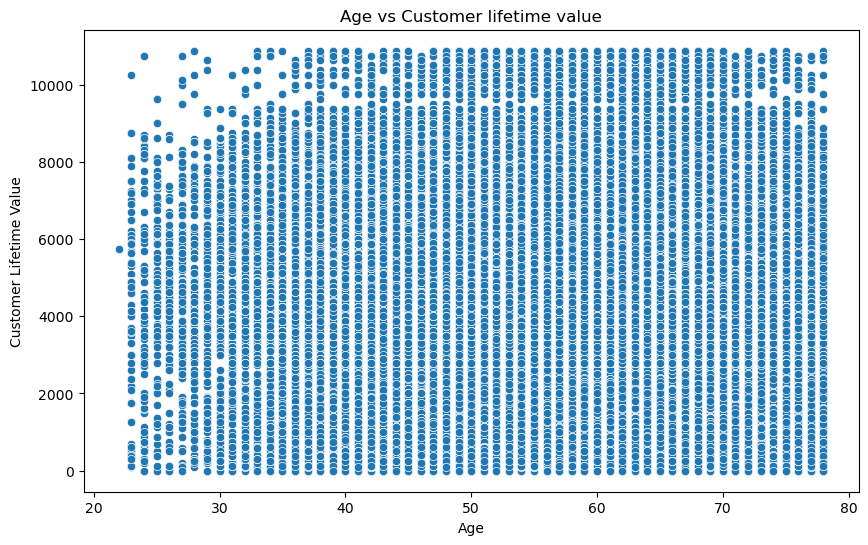

In [188]:
# Visualization against clv
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="customer_lifetime_value", data=data)
plt.title("Age vs Customer lifetime value")
plt.xlabel("Age")
plt.ylabel("Customer Lifetime Value")
plt.show()

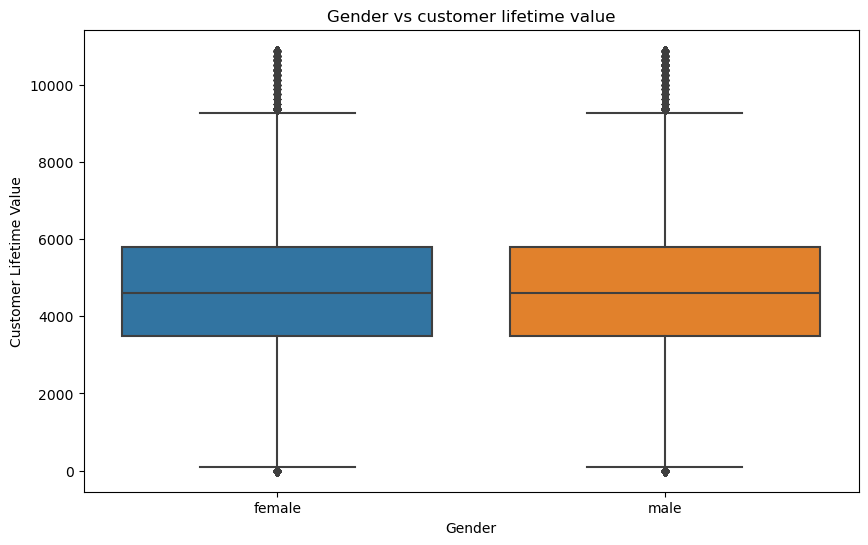

In [189]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="customer_lifetime_value", data=data)
plt.title("Gender vs customer lifetime value")
plt.xlabel("Gender")
plt.ylabel("Customer Lifetime Value")
plt.show()

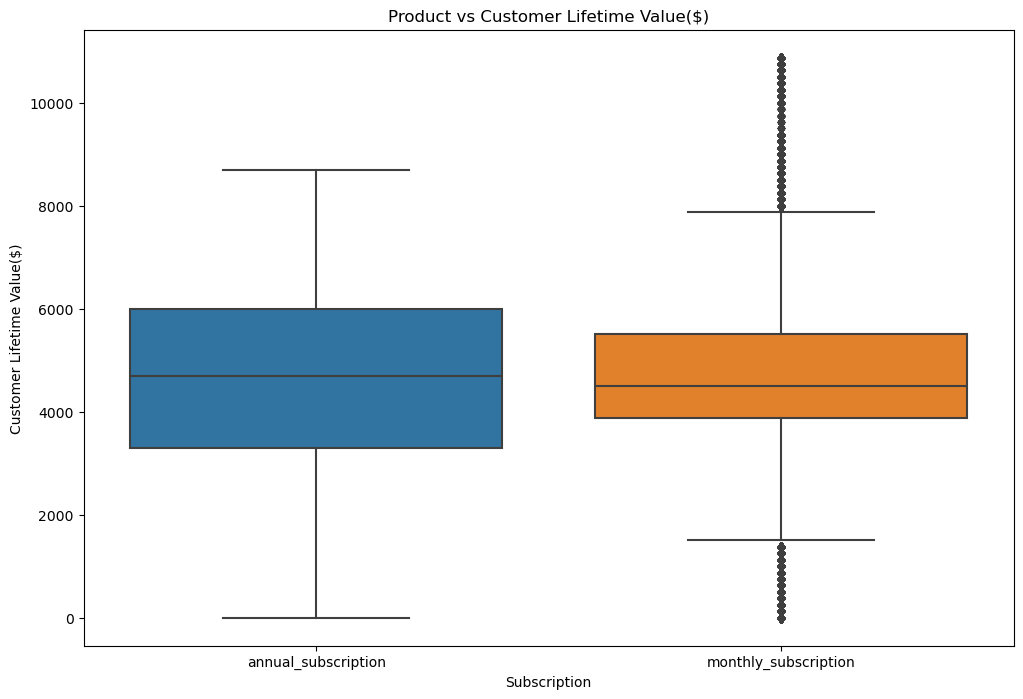

In [190]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="name", y="customer_lifetime_value", data=data)
plt.title("Product vs Customer Lifetime Value($)")
plt.xlabel("Subscription")
plt.ylabel("Customer Lifetime Value($)")
plt.show()

c:\Users\bubba\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


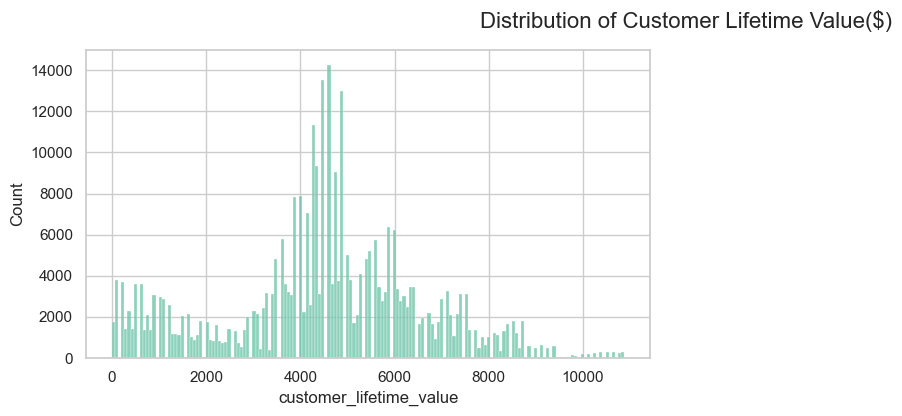

In [252]:
sns.set_theme(style="whitegrid", palette="Set2")

fig = plt.figure(figsize=(16, 4))
fig.suptitle("Distribution of Customer Lifetime Value($)", size=16)

# Histogram
plt.subplot(1,2,1)
sns.histplot(data=data, x="customer_lifetime_value")

plt.show()

In [149]:
# find out how many repeat cases by same customer
#we assume the sign up is upto 30 -April 2024
# that as may we add a CLV column that will be our target
# we will do both segementation and clv
# null values for cancel date and time will be 30th April 2024
# time is important in analysis
# drop time column
# time might affect recommendation of customer service 

***
we note 
- 330512 total cases
- 


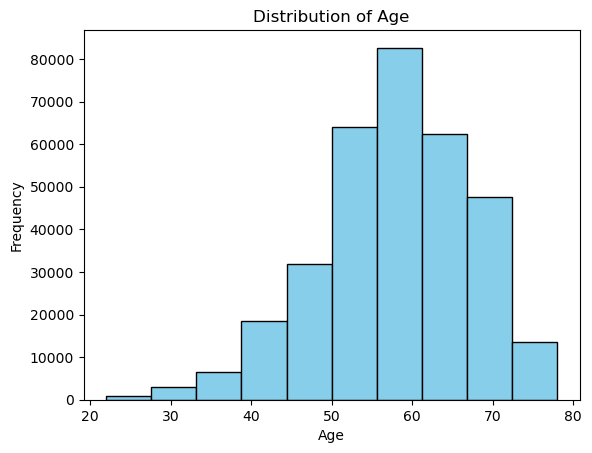

In [150]:
# visualizing age distribution
plt.hist(data["age"], bins=10, color="skyblue", edgecolor="black")

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

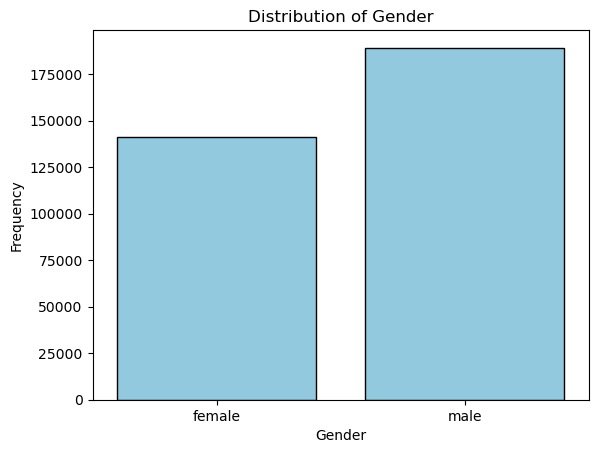

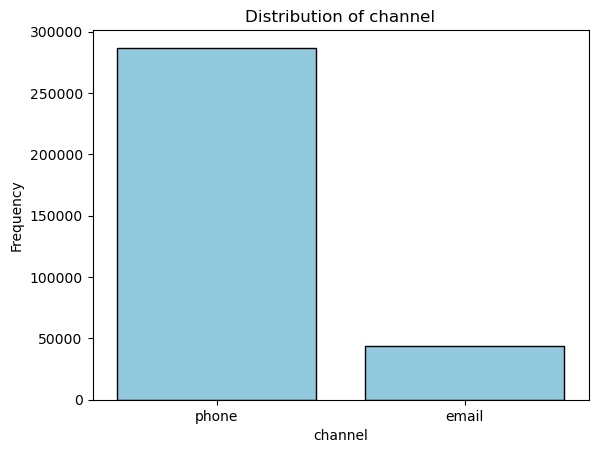

In [151]:
sns.countplot(x='gender', data=data, color="skyblue", edgecolor="black")

plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")
plt.show()
sns.countplot(x='channel', data=data, color="skyblue", edgecolor="black")

plt.xlabel("channel")
plt.ylabel("Frequency")
plt.title("Distribution of channel")
plt.show()

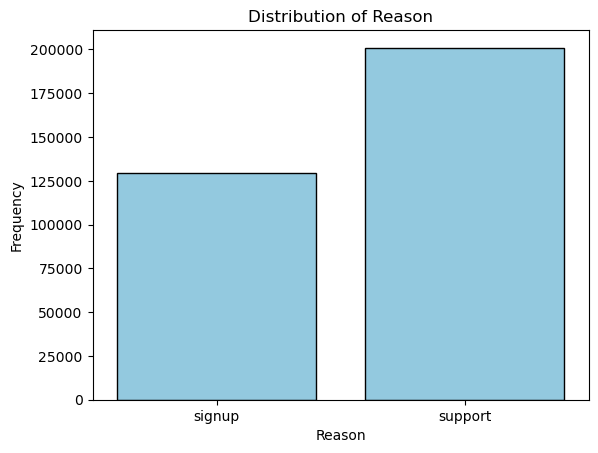

In [152]:
sns.countplot(x='reason', data=data, color="skyblue", edgecolor="black")

plt.xlabel("Reason")
plt.ylabel("Frequency")
plt.title("Distribution of Reason")
plt.show()

In [153]:
#merged_cases_cProduct[["date_time", "signup_date_time", "cancel_date_time"]] = merged_cases_cProduct[["date_time", "signup_date_time", "cancel_date_time"]].apply(pd.to_datetime)
#merge_case_encoded = pd.get_dummies(merged_cases_cProduct, columns=["channel", "reason", "product","signup_date_time", "cancel_date_time"], sparse=True)


In [154]:
#encoded_features = merge_case_encoded[['date_time', 'signup_date_time', 'cancel_date_time', 'channel_phone', 'channel_email', 'reason_signup', 'reason_support']]
#correlation_matrix = encoded_features.corr()
#print(correlation_matrix)

In [155]:
#case["date_time"] = pd.to_datetime(case["date_time"])
##case_encoded = pd.get_dummies(case, columns=["channel", "reason"])
#encoded_features = case_encoded[['channel_phone', 'channel_email', 'reason_signup', 'reason_support']]
#correlation_matrix = encoded_features.corr()
#print(correlation_matrix)